# Import Libraries

In [15]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [2]:
# Defining path
path=r'/Users/guillaumemac/06-2023 Instacart Basket Analysis'

In [4]:
# Importing Data
ords_prods_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','new_ords_prods.pkl'))

In [5]:
#Checking the shape of the data
ords_prods_merge.shape

(32404859, 23)

In [6]:
#Checking data output
ords_prods_merge.head(5)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,both,Mid-range product,Regular days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer


<Axes: >

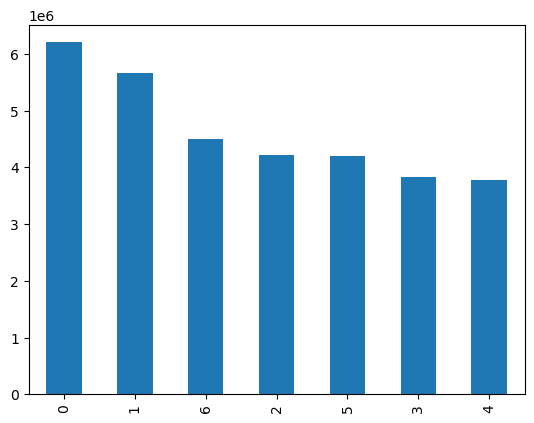

In [7]:
#Creating a bar chart
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar()

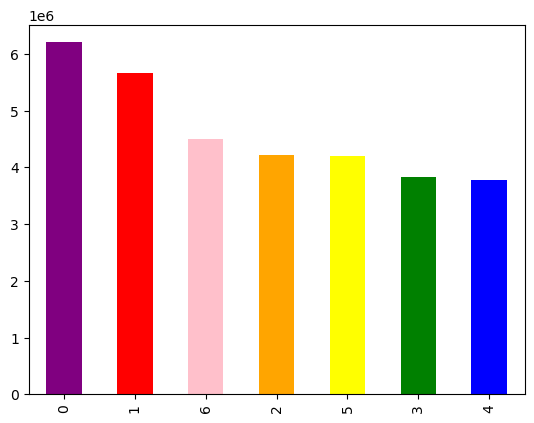

In [8]:
#adding colors to the bar chart
bar=ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

In [9]:
#Exporting the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# #Creating Histograms and scatterplots

<Axes: ylabel='Frequency'>

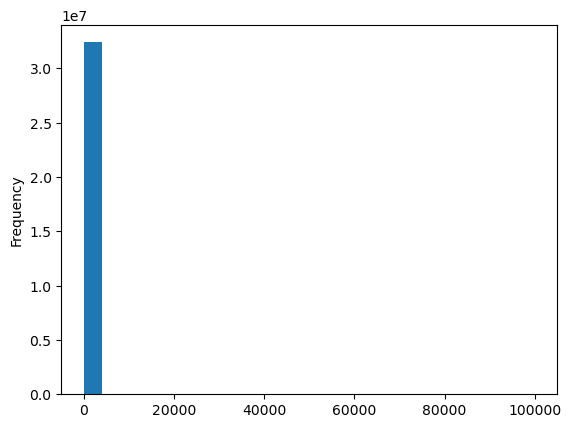

In [11]:
#Creating Histograms
ords_prods_merge['prices'].plot.hist(bins=25)

<Axes: xlabel='prices', ylabel='prices'>

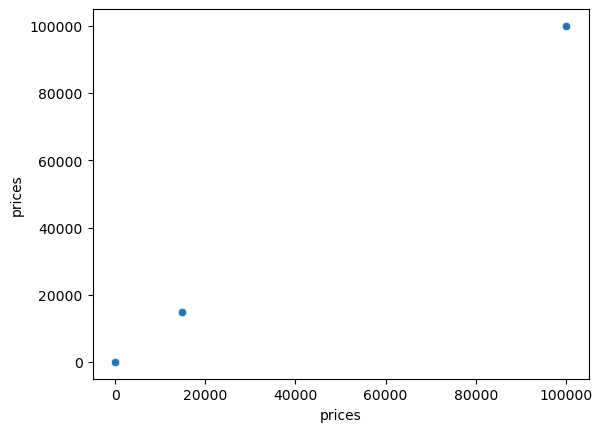

In [14]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
#Checking for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regular days,Most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regular days,Most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regular days,Average orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,both,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,both,High-range product,Busiest days,Most orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,both,High-range product,Slowest days,Most orders,15,Regular customer,451.153540,High Spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,both,High-range product,Slowest days,Average orders,12,Regular customer,1178.381871,High Spender,12.0,Regular customer


In [17]:
#Marking outliers as missing values
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

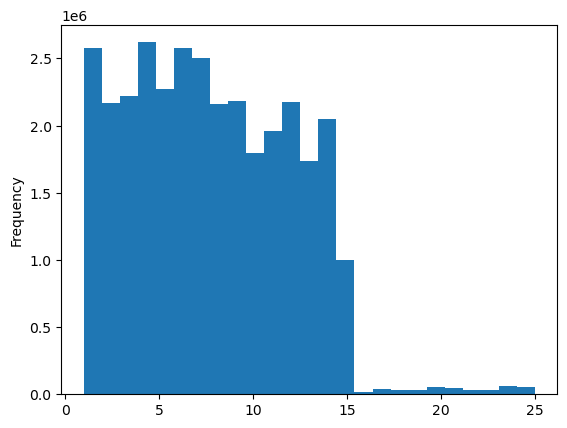

In [20]:
#Creating Histograms
ords_prods_merge['prices'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

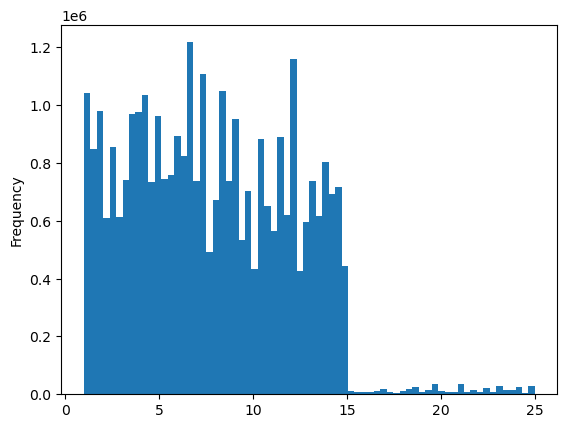

In [21]:
#Creating Histograms
ords_prods_merge['prices'].plot.hist(bins=70)

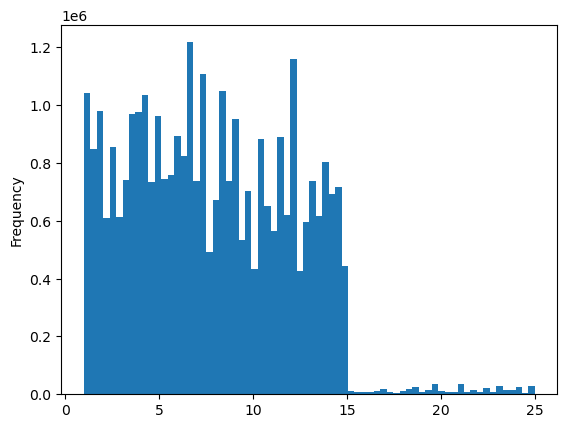

In [25]:
hist=ords_prods_merge['prices'].plot.hist(bins=70)

In [26]:
#Exporting the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# Creating a Line Chart

In [29]:
# Create a List holding True/False values to the test np.random.rant () <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [31]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge [~dev]

In [32]:
len(ords_prods_merge)

32404859

In [33]:
len(big)+len(small)

32404859

In [35]:
df_2 = small[['orders_day_of_the_week','prices']]

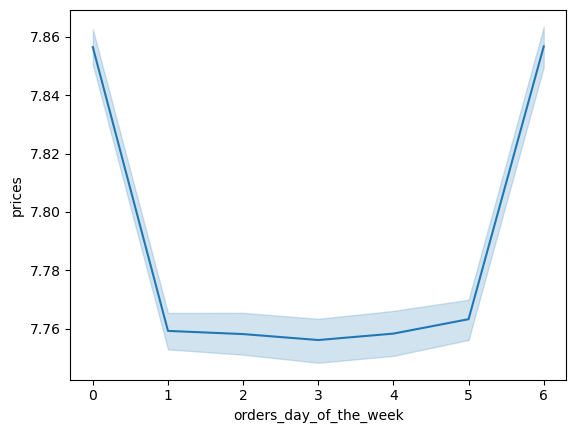

In [37]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')

In [38]:
#Exporting the linechart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart.png'))